In [1]:
# [1] - Fonte Nishiura, Hiroshi. 2006. Mathematical and Statistical Analyses of the Spread of Dengue. Dengue Bulletin 30: 51-67.

# [2] - A dengue pode ser contraída mais de uma vez?
# Ao contrair dengue, a pessoa fica imunizada permanentemente para aquele sorotipo do vírus, mas não para os outros. Dessa forma, uma mesma pessoa pode ter dengue até quatro vezes. A segunda infecção por qualquer sorotipo da dengue é, na maioria das vezes, mais grave do que a primeira, independentemente dos sorotipos e de sua seqüência. Contudo, o tipo 3 mostra-se mais virulento. É importante lembrar, porém, que manifestações mais graves da dengue podem ocorrer na primeira infecção.
# https://mosquito.saude.es.gov.br/mitos-e-verdades

# [3] - População  de  Aedes  aegypti  (l.)  em  áreaendêmica  de  dengue,  Sudeste  do  Brasil - 
# http://www.scielo.br/pdf/rsp/v35n3/5007.pdf

# [4] - https://www.scielosp.org/article/ssm/content/raw/?resource_ssm_path=/media/assets/ress/v25n4/2237-9622-ress-25-04-00725.pdf


In [2]:
import scipy.integrate
import numpy
import matplotlib.pyplot as plt

In [3]:
# The SIR-VECTOR model differential equations. [1]
def deriv(y, t, Nh, Bh, gamma, u_h, b, m, A, u_v, Bv):
    Sh, Ih, Rh, Sv, Iv = y
    dShdt = u_h*(Nh-Sh) - ((Bh * b)*(Sh * Iv)/(Nh + m))
    dIhdt = (Bh * b) * (Sh * Iv)/ (Nh + m)  - ((u_h + gamma) * Ih)
    dRhdt = (gamma * Ih) - (u_h * Rh)
    dSvdt = A - ((Bv *  b)*(Sv*Ih)/(Nh + m)) - (u_v * Sv)
    dIvdt = ((Bv * b)*(Sv*Ih)/(Nh+m)) - (u_v * Iv)
    return dShdt, dIhdt, dRhdt, dSvdt, dIvdt

In [4]:
# População da amostra
Nh = 1000000 # [3]
# Casos registrados para cada 100 mil habitantes em 2018 [ http://portalarquivos2.saude.gov.br/images/pdf/2019/abril/30/informe-arboviroses-15.pdf]
infectados = 49.2
# https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html
taxa_mortalidade = 608



In [5]:
# βh Probabilidade de transmissão do Vetor -> Humanos
Bh = 0.4 # [1]
# Taxa de humanos infectados que se recuperam e ficam imunes a doença;
gamma = 0.25 # [2]
# μh Taxa percapita de mortalidade dos humanos não relacionado a doença
u_h = taxa_mortalidade / Nh
# b, Quantas vezes por dia um mosquito morde as pessoas.
b = 1 # [1]
# m, Numero dos hospediros alternativos;
m = 0 # [1]
# A, taxa constante de novos mosquitos que entram na população;
A = 50000 # [1]   
# μv Mortalidade per capita dos mosquitos
u_v = 0.1 # [1]
# βv Probabilidade de transmissão Humano -> Vetor
Bv = 0.4 # [1] 
# Infected Humans: Número de individuos infectados quando o modelo começou a rodar;
Ih = infectados 
# Número de individuos recuperados no inicio da execução do modelo;
Rh = infectados 
# Susceptible Vectors: O número de vetores suscetíveis no início da execução do modelo.
Sv = 0
# Infected Vector: O número de vetores infectados no início da execução do modelo.
Iv = 0 
# Populacao 

# Initial: Numero dos humanos sucetiveis no inicio do modelo
Sh = Nh - Ih

meses = 12
dias = 30
t = numpy.linspace(0, meses*dias, meses*dias)

In [6]:
y0 = Sh, Ih, Rh, Sv, Iv # Vetor de condições inciais
args = Nh, Bh, gamma, u_h, b, m, A, u_v, Bv
# Integrate the SIR equations over the time grid, t.
ret = scipy.integrate.odeint(deriv, y0, t, args=args)
Sh, Ih, Rh, Sv, Iv = ret.T

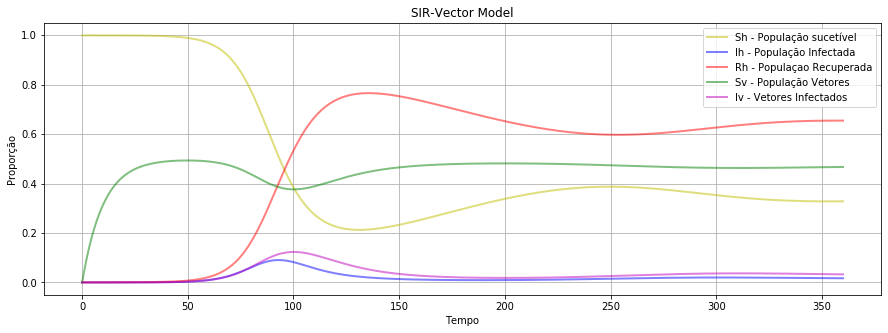

In [7]:
plt.figure(figsize=[15,5])
plt.plot(t, Sh/Nh, 'y', alpha=0.5, lw=2, label='Sh - População sucetível')
plt.plot(t, Ih/Nh, 'b', alpha=0.5, lw=2, label='Ih - População Infectada')
plt.plot(t, Rh/Nh, 'r', alpha=0.5, lw=2, label='Rh - Populaçao Recuperada')
plt.plot(t, Sv/Nh, 'g', alpha=0.5, lw=2, label='Sv - População Vetores')
plt.plot(t, Iv/Nh, 'm', alpha=0.5, lw=2, label='Iv - Vetores Infectados')
plt.grid()
plt.legend()
plt.xlabel("Tempo")
plt.ylabel("Proporção")
plt.title("SIR-Vector Model")
plt.show()